In [24]:
import sqlite3
import pandas as pd
import numpy as np
import re
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Embedding, SpatialDropout1D, Bidirectional, LSTM, Dense

In [25]:
nom_base_de_donnees = "ma_base_de_donnees.db"

colonne1 = "Good_chords"
colonne2 = "notes"

df = pd.DataFrame()

# Connexion à la base de données
connexion = sqlite3.connect(nom_base_de_donnees)

# Liste des tables disponibles dans la base de données
tables_query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(tables_query, connexion)['name']

for nom_table in tables:
    requete_sql = f"SELECT {colonne1}, {colonne2} FROM \"{nom_table}\""
    table_df = pd.read_sql_query(requete_sql, connexion)

    df = pd.concat([df, table_df], ignore_index=True)

# Fermeture de la connexion
connexion.close()


In [26]:
df_bis = pd.DataFrame()
df_bis['notes'] = df['notes'].str.replace('[','')
df_bis['notes'] = df_bis['notes'].str.replace(']','')
df_bis['notes'] = df_bis['notes'].str.replace("'",'')
df_bis['notes'] = df_bis['notes'].str.replace(' ','')
df_bis.head()

,notes
0,nan
1,"E,G#,B"
2,"A,C#,E"
3,"E,G#,B"
4,"B,D#,F#"


In [27]:
long = []

for val in df_bis['notes']:
    long.append(len(val))

# La variable max_features devrait contenir la longueur maximale de vos séquences, pas la valeur maximale des longueurs
max_sequence_length = np.max(long)
max_features = 7

tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=7, split=',')
tokenizer.fit_on_texts(df['notes'].values)
X = tokenizer.texts_to_sequences(df['notes'].values)

# Ajoutez la spécification de la longueur maximale de la séquence (input_length) ici
X = tf.keras.preprocessing.sequence.pad_sequences(X, maxlen=max_sequence_length)

# Affichez la forme de X pour voir la longueur maximale
print("Shape of X:", X.shape)


Shape of X: (1011, 13)


In [28]:
max_sequence_length

13

In [29]:
nb_classe = len(np.unique(df['Good_chords']))
classes = np.unique(df['Good_chords'])
Y = pd.get_dummies(df['Good_chords'])
Y = Y.values

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(677, 13) (677, 45)
(334, 13) (334, 45)


In [31]:
embed_dim = 256
lstm_out = 196

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(max_features, embed_dim, input_length = X.shape[1]))
model.add(tf.keras.layers.SpatialDropout1D(0.4))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_out, dropout=0.05, recurrent_dropout=0.2)))
model.add(tf.keras.layers.Dense(nb_classe, activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [32]:
embed_dim = 147
lstm_out = 196

model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Embedding(max_features, embed_dim, input_length = X.shape[1]))
model2.add(tf.keras.layers.SpatialDropout1D(0.4))
model2.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_out, dropout=0.05, recurrent_dropout=0.2)))
model2.add(tf.keras.layers.Dense(nb_classe, activation='softmax'))
model2.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [33]:
embed_dim = 12
lstm_out = 196

model3 = tf.keras.Sequential()
model3.add(tf.keras.layers.Embedding(max_features, embed_dim, input_length = X.shape[1]))
model3.add(tf.keras.layers.SpatialDropout1D(0.4))
model3.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_out, dropout=0.05, recurrent_dropout=0.2)))
model3.add(tf.keras.layers.Dense(nb_classe, activation='softmax'))
model3.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [34]:
embed_dim = 73
lstm_out = 196

model4 = tf.keras.Sequential()
model4.add(tf.keras.layers.Embedding(max_features, embed_dim, input_length = X.shape[1]))
model4.add(tf.keras.layers.SpatialDropout1D(0.4))
model4.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_out, dropout=0.05, recurrent_dropout=0.2)))
model4.add(tf.keras.layers.Dense(nb_classe, activation='softmax'))
model4.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [35]:
embed_dim = 24
lstm_out = 196

model5 = tf.keras.Sequential()
model5.add(tf.keras.layers.Embedding(max_features, embed_dim, input_length = X.shape[1]))
model5.add(tf.keras.layers.SpatialDropout1D(0.4))
model5.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_out, dropout=0.05, recurrent_dropout=0.2)))
model5.add(tf.keras.layers.Dense(nb_classe, activation='softmax'))
model5.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [36]:
history = model.fit(X_train, Y_train, epochs=20,validation_split=0.3)

Epoch 1/20
15/15 [==============================] - 7s 122ms/step - loss: 3.3251 - accuracy: 0.1416 - val_loss: 2.9400 - val_accuracy: 0.1275
Epoch 2/20
15/15 [==============================] - 2s 151ms/step - loss: 2.8352 - accuracy: 0.1628 - val_loss: 2.7817 - val_accuracy: 0.2500
Epoch 3/20
15/15 [==============================] - 2s 145ms/step - loss: 2.5614 - accuracy: 0.3573 - val_loss: 2.4197 - val_accuracy: 0.5441
Epoch 4/20
15/15 [==============================] - 2s 146ms/step - loss: 1.9693 - accuracy: 0.5581 - val_loss: 1.7328 - val_accuracy: 0.7304
Epoch 5/20
15/15 [==============================] - 2s 140ms/step - loss: 1.3663 - accuracy: 0.7082 - val_loss: 1.2962 - val_accuracy: 0.7647
Epoch 6/20
15/15 [==============================] - 2s 138ms/step - loss: 0.9822 - accuracy: 0.7738 - val_loss: 0.9652 - val_accuracy: 0.7745
Epoch 7/20
15/15 [==============================] - 2s 140ms/step - loss: 0.7457 - accuracy: 0.8055 - val_loss: 0.9041 - val_accuracy: 0.8235
Epoch 

In [37]:
history2 = model2.fit(X_train, Y_train, epochs=20,validation_split=0.3)

Epoch 1/20
15/15 [==============================] - 8s 138ms/step - loss: 3.4150 - accuracy: 0.1015 - val_loss: 3.0292 - val_accuracy: 0.1225
Epoch 2/20
15/15 [==============================] - 1s 102ms/step - loss: 2.8630 - accuracy: 0.1712 - val_loss: 2.9228 - val_accuracy: 0.2990
Epoch 3/20
15/15 [==============================] - 2s 103ms/step - loss: 2.6676 - accuracy: 0.3404 - val_loss: 2.5390 - val_accuracy: 0.3873
Epoch 4/20
15/15 [==============================] - 2s 107ms/step - loss: 2.2293 - accuracy: 0.4186 - val_loss: 2.1019 - val_accuracy: 0.5588
Epoch 5/20
15/15 [==============================] - 2s 109ms/step - loss: 1.7280 - accuracy: 0.5539 - val_loss: 1.6055 - val_accuracy: 0.6275
Epoch 6/20
15/15 [==============================] - 2s 107ms/step - loss: 1.2660 - accuracy: 0.7040 - val_loss: 1.2703 - val_accuracy: 0.6422
Epoch 7/20
15/15 [==============================] - 2s 108ms/step - loss: 0.9497 - accuracy: 0.7484 - val_loss: 1.0320 - val_accuracy: 0.7647
Epoch 

In [38]:
history3 = model3.fit(X_train, Y_train, epochs=20,validation_split=0.3)

Epoch 1/20
15/15 [==============================] - 9s 122ms/step - loss: 3.5937 - accuracy: 0.1142 - val_loss: 3.1297 - val_accuracy: 0.1275
Epoch 2/20
15/15 [==============================] - 1s 86ms/step - loss: 2.9674 - accuracy: 0.1163 - val_loss: 3.0217 - val_accuracy: 0.1569
Epoch 3/20
15/15 [==============================] - 1s 87ms/step - loss: 2.9107 - accuracy: 0.1501 - val_loss: 2.9878 - val_accuracy: 0.1225
Epoch 4/20
15/15 [==============================] - 1s 86ms/step - loss: 2.8511 - accuracy: 0.1332 - val_loss: 2.9462 - val_accuracy: 0.1225
Epoch 5/20
15/15 [==============================] - 1s 82ms/step - loss: 2.7843 - accuracy: 0.2537 - val_loss: 2.7851 - val_accuracy: 0.2500
Epoch 6/20
15/15 [==============================] - 1s 91ms/step - loss: 2.5820 - accuracy: 0.3340 - val_loss: 2.5121 - val_accuracy: 0.4069
Epoch 7/20
15/15 [==============================] - 1s 84ms/step - loss: 2.2847 - accuracy: 0.3488 - val_loss: 2.2537 - val_accuracy: 0.3284
Epoch 8/20
1

In [39]:
history4 = model4.fit(X_train, Y_train, epochs=20,validation_split=0.3)

Epoch 1/20
15/15 [==============================] - 9s 122ms/step - loss: 3.5088 - accuracy: 0.0994 - val_loss: 3.0807 - val_accuracy: 0.2500
Epoch 2/20
15/15 [==============================] - 1s 90ms/step - loss: 2.8930 - accuracy: 0.1734 - val_loss: 2.9421 - val_accuracy: 0.1225
Epoch 3/20
15/15 [==============================] - 1s 88ms/step - loss: 2.7737 - accuracy: 0.2600 - val_loss: 2.7512 - val_accuracy: 0.2794
Epoch 4/20
15/15 [==============================] - 1s 81ms/step - loss: 2.4671 - accuracy: 0.3108 - val_loss: 2.4444 - val_accuracy: 0.2990
Epoch 5/20
15/15 [==============================] - 1s 86ms/step - loss: 2.0899 - accuracy: 0.4757 - val_loss: 2.0818 - val_accuracy: 0.2990
Epoch 6/20
15/15 [==============================] - 1s 100ms/step - loss: 1.7357 - accuracy: 0.5116 - val_loss: 1.7413 - val_accuracy: 0.6127
Epoch 7/20
15/15 [==============================] - 1s 88ms/step - loss: 1.4144 - accuracy: 0.6744 - val_loss: 1.4810 - val_accuracy: 0.7402
Epoch 8/20


In [40]:
history5 = model5.fit(X_train, Y_train, epochs=20,validation_split=0.3)

Epoch 1/20
15/15 [==============================] - 9s 115ms/step - loss: 3.5461 - accuracy: 0.1268 - val_loss: 3.1099 - val_accuracy: 0.1225
Epoch 2/20
15/15 [==============================] - 1s 76ms/step - loss: 2.9587 - accuracy: 0.1036 - val_loss: 2.9963 - val_accuracy: 0.1225
Epoch 3/20
15/15 [==============================] - 1s 82ms/step - loss: 2.8666 - accuracy: 0.1564 - val_loss: 2.9341 - val_accuracy: 0.1225
Epoch 4/20
15/15 [==============================] - 1s 80ms/step - loss: 2.7455 - accuracy: 0.2326 - val_loss: 2.6231 - val_accuracy: 0.2500
Epoch 5/20
15/15 [==============================] - 1s 82ms/step - loss: 2.4148 - accuracy: 0.2664 - val_loss: 2.3571 - val_accuracy: 0.2990
Epoch 6/20
15/15 [==============================] - 1s 80ms/step - loss: 2.1720 - accuracy: 0.3552 - val_loss: 2.1583 - val_accuracy: 0.3578
Epoch 7/20
15/15 [==============================] - 1s 84ms/step - loss: 1.9495 - accuracy: 0.3890 - val_loss: 2.1386 - val_accuracy: 0.3333
Epoch 8/20
1

In [41]:
score, acc = model.evaluate(X_test, Y_test, verbose=2, batch_size=64)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

6/6 - 0s - loss: 0.7136 - accuracy: 0.8473 - 210ms/epoch - 35ms/step
score: 0.71
acc: 0.85


In [42]:
score, acc = model2.evaluate(X_test, Y_test, verbose=2, batch_size=64)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

6/6 - 0s - loss: 0.7357 - accuracy: 0.8593 - 205ms/epoch - 34ms/step
score: 0.74
acc: 0.86


In [43]:
score, acc = model3.evaluate(X_test, Y_test, verbose=2, batch_size=64)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

6/6 - 0s - loss: 1.3746 - accuracy: 0.7246 - 131ms/epoch - 22ms/step
score: 1.37
acc: 0.72


In [44]:
score, acc = model4.evaluate(X_test, Y_test, verbose=2, batch_size=64)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

6/6 - 0s - loss: 0.8270 - accuracy: 0.8293 - 145ms/epoch - 24ms/step
score: 0.83
acc: 0.83


In [45]:
score, acc = model5.evaluate(X_test, Y_test, verbose=2, batch_size=64)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

6/6 - 0s - loss: 0.9194 - accuracy: 0.8024 - 124ms/epoch - 21ms/step
score: 0.92
acc: 0.80


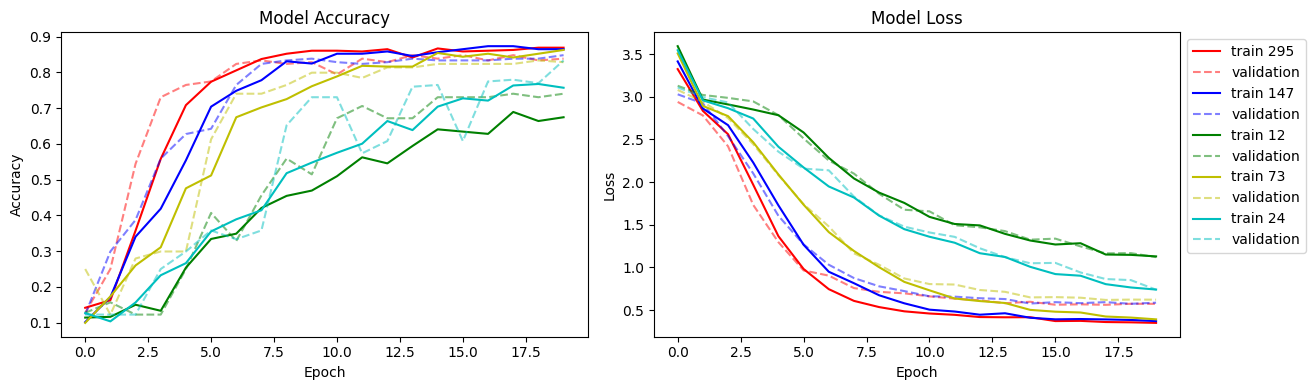

In [46]:
import matplotlib.pyplot as plt

# Créez une figure avec une grille de sous-graphiques 1x2
fig, axs = plt.subplots(1, 2, figsize=(12, 4))  # Ajustez la taille de la figure selon vos besoins

# Premier sous-graphique (précisez le nombre d'époques dans 'range(len(history1['accuracy']))')
axs[0].plot(range(len(history.history['accuracy'])), history.history['accuracy'], color='r')
axs[0].plot(range(len(history.history['val_accuracy'])), history.history['val_accuracy'],linestyle='--', color='r', alpha=0.5)
axs[0].plot(range(len(history2.history['accuracy'])), history2.history['accuracy'], label='train',color='b')
axs[0].plot(range(len(history2.history['val_accuracy'])), history2.history['val_accuracy'],linestyle='--', color='b', alpha=0.5)
axs[0].plot(range(len(history3.history['accuracy'])), history3.history['accuracy'], color='g')
axs[0].plot(range(len(history3.history['val_accuracy'])), history3.history['val_accuracy'], linestyle='--', color='g', alpha=0.5)
axs[0].plot(range(len(history4.history['accuracy'])), history4.history['accuracy'],color='y')
axs[0].plot(range(len(history4.history['val_accuracy'])), history4.history['val_accuracy'], linestyle='--', color='y', alpha=0.5)
axs[0].plot(range(len(history5.history['accuracy'])), history5.history['accuracy'], color='c')
axs[0].plot(range(len(history5.history['val_accuracy'])), history5.history['val_accuracy'], linestyle='--', color='c', alpha=0.5)

axs[0].set_title('Model Accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')


axs[1].plot(range(len(history.history['loss'])), history.history['loss'], label='train 295',color='r')
axs[1].plot(range(len(history.history['val_loss'])), history.history['val_loss'], label='validation',linestyle='--', color='r', alpha=0.5)
axs[1].plot(range(len(history2.history['loss'])), history2.history['loss'], label='train 147',color='b')
axs[1].plot(range(len(history2.history['val_loss'])), history2.history['val_loss'], label='validation',linestyle='--', color='b', alpha=0.5)
axs[1].plot(range(len(history3.history['loss'])), history3.history['loss'], label='train 12',color='g')
axs[1].plot(range(len(history3.history['val_loss'])), history3.history['val_loss'], label='validation',linestyle='--', color='g', alpha=0.5)
axs[1].plot(range(len(history4.history['loss'])), history4.history['loss'], label='train 73',color='y')
axs[1].plot(range(len(history4.history['val_loss'])), history4.history['val_loss'], label='validation',linestyle='--', color='y', alpha=0.5)
axs[1].plot(range(len(history5.history['loss'])), history5.history['loss'], label='train 24',color='c')
axs[1].plot(range(len(history5.history['val_loss'])), history5.history['val_loss'], label='validation',linestyle='--', color='c', alpha=0.5)

axs[1].set_title('Model Loss')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].legend(loc='upper left')

# Ajustez l'espacement entre les sous-graphiques
plt.tight_layout()

axs.flatten()[-1].legend(loc='upper left', bbox_to_anchor=(1, 1))

# Affichez la figure
plt.show()


In [2]:
import conversion_notes
from importlib import reload
reload(conversion_notes)

<module 'conversion_notes' from 'c:\\Users\\lucie\\Documents\\Programmation\\PFE_Analayse_musicale\\Chords_analysis\\rnn\\conversion_notes.py'>

In [4]:
import conversion_notes
dossier_test = r"C:\Users\lucie\Documents\Programmation\Beatles\test"

dataframe_test = conversion_notes.create_df(dossier_test)
res = conversion_notes.cleaning_df(dataframe_test)
res['notes'] = res['notes'].str.replace('[','')
res['notes'] = res['notes'].str.replace(']','')
res['notes'] = res['notes'].str.replace("'",'')
res['notes'] = res['notes'].str.replace(' ','')
res.head()

,start,end,chords,NomFichier,Decompo,Good_chords,notes,taille_sequence
0,0.000,0.000,N,It_Won't_Be_Long,"['N', 'M', ' ']",NM,nan,NaN
1,0.000,1.511,N,It_Won't_Be_Long,"['N', 'M', ' ']",NM,nan,NaN
2,1.511,4.936,C,It_Won't_Be_Long,"['C', 'M', ' ']",CM,"C,E,G",3.0
3,4.936,6.678,G:9,It_Won't_Be_Long,"['G', '9', ' ']",G9,"G,B,D,F,A",5.0
4,6.678,11.129,N,It_Won't_Be_Long,"['N', 'M', ' ']",NM,nan,NaN


In [5]:
seq = res['notes']

# Convertissez les séquences en représentations numériques
twt_sequences = tokenizer.texts_to_sequences(seq)
# Remplacez les valeurs manquantes par des zéros
twt_padded = tf.keras.preprocessing.sequence.pad_sequences(twt_sequences, maxlen=X.shape[1], dtype='int32', value=0)

NameError: name 'tokenizer' is not defined

In [49]:
# Effectuez la prédiction avec votre modèle
predictions = model.predict(twt_padded, batch_size=len(seq))
pred = []

# Affichez les résultats pour chaque séquence
for i, prediction in enumerate(predictions):
    predicted_class_index = np.argmax(prediction)
    predicted_class = classes[predicted_class_index]
    pred.append(predicted_class)
    print(f"Séquence {i+1} - Classe prédite : {predicted_class}")

1/1 [==============================] - 1s 529ms/step
Séquence 1 - Classe prédite : NM
Séquence 2 - Classe prédite : NM
Séquence 3 - Classe prédite : NM
Séquence 4 - Classe prédite : NM
Séquence 5 - Classe prédite : NM
Séquence 6 - Classe prédite : NM
Séquence 7 - Classe prédite : NM
Séquence 8 - Classe prédite : NM
Séquence 9 - Classe prédite : NM
Séquence 10 - Classe prédite : NM
Séquence 11 - Classe prédite : NM
Séquence 12 - Classe prédite : NM
Séquence 13 - Classe prédite : NM
Séquence 14 - Classe prédite : NM
Séquence 15 - Classe prédite : NM
Séquence 16 - Classe prédite : NM
Séquence 17 - Classe prédite : NM
Séquence 18 - Classe prédite : NM
Séquence 19 - Classe prédite : NM
Séquence 20 - Classe prédite : NM
Séquence 21 - Classe prédite : NM
Séquence 22 - Classe prédite : NM
Séquence 23 - Classe prédite : NM
Séquence 24 - Classe prédite : NM
Séquence 25 - Classe prédite : NM
Séquence 26 - Classe prédite : NM
Séquence 27 - Classe prédite : NM
Séquence 28 - Classe prédite : NM
Séqu

In [50]:
count = 0
faux_pred = []
real = []

for i in range(len(pred)):
    if pred[i] == res['Good_chords'][i]:
        count+=1
    else:
        faux_pred.append(pred[i])
        real.append(res['Good_chords'][i])

count/70 * 100

2.857142857142857